In [1]:
import numpy as np 

# import matplotlib
# matplotlib.use('TKAgg')

import matplotlib.pyplot as pp
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

def accel_x (thetadot, xdot, theta):
    return (2*F+2*F*l**2*m-2*b*xdot-2*b*l**2*m*xdot+2*l**3*m**2*thetadot**2*np.sin(theta)+2*l*m*thetadot**2*np.sin(theta)+g*l**2*m**2*np.sin(2*theta))/(2*M+l**2*m**2+2*M*l**2*m+2*m-l**2*m**2*np.cos(2*theta))*mint

def accel_theta (thetadot, xdot, theta):
    return (-2*F*l*m*np.cos(theta)+2*b*l*m*xdot*np.cos(theta)-2*g*l*m**2*np.sin(theta)-2*M*g*l*m*np.sin(theta)-l**2*m**2*thetadot**2*np.sin(2*theta))/(2*M+l**2*m**2+2*M*l**2*m+2*m-l**2*m**2*np.cos(2*theta))*mint

# Crane Specification
F = 0
M = 5
b = 1

#pendulum_specification
m = 3.0
g = 9.8
mint = 12.0
l = 2.0
initial_angle = 90.0

# Time Step
initial_step = 0
h = 0.01
final_step = 10.0
t = np.arange(initial_step, final_step, h)
n = len(t) 

# theta punya
y=np.zeros(n)
y_v=np.zeros(n)
y[0] = np.radians(initial_angle) 
y_v[0] = np.radians(0.0)

# crane punya
x=np.zeros(n)
x_v=np.zeros(n)
x[0] = 0 
x_v[0] = 0

for i in range(0, n-1): 
    k1y = h*y_v[i]
    k1vy = h*accel_theta(y_v[i], x_v[i], y[i])

    k1x = h*x_v[i]
    k1vx = h*accel_x(y_v[i], x_v[i], y[i])

    k2y = h*(y_v[i]+0.5*k1vy)
    k2vy = h*accel_theta(y_v[i]+0.5*k1vy, x_v[i]+0.5*k1vx, y[i]+0.5*k1y)
    
    k2x = h*(x_v[i]+0.5*k1vx)
    k2vx = h*accel_x(y_v[i]+0.5*k1vy, x_v[i]+0.5*k1vx, y[i]+0.5*k1y)

    k3y = h*(y_v[i]+0.5*k2vy)
    k3vy = h*accel_theta(y_v[i]+0.5*k2vy, x_v[i]+0.5*k2vx, y[i]+0.5*k2y)
    
    k3x = h*(x_v[i]+0.5*k2vx)
    k3vx = h*accel_x(y_v[i]+0.5*k2vy, x_v[i]+0.5*k2vx, y[i]+0.5*k2y)

    k4y = h*(y_v[i]+k3vy)
    k4vy = h*accel_theta(y_v[i]+k3vy, x_v[i]+k3vx, y[i]+k3y)
    
    k4x = h*(x_v[i]+k3vx)
    k4vx = h*accel_x(y_v[i]+k3vy, x_v[i]+k3vx, y[i]+k3y)

    # Update next value of y 
    y[i+1] = y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0 
    y_v[i+1] = y_v[i] + (k1vy + 2 * k2vy + 2 * k3vy + k4vy) / 6.0

    # Update next value of x
    x[i+1] = x[i] + (k1x + 2 * k2x + 2 * k3x + k4x) / 6.0 
    x_v[i+1] = x_v[i] + (k1vx + 2 * k2vx + 2 * k3vx + k4vx) / 6.0

# plt.plot(t, np.degrees(y))
# plt.title('Pendulum Motion:')
# plt.xlabel('Time (s)')
# plt.ylabel('Angle (deg)')
# plt.grid(True)
# plt.show()

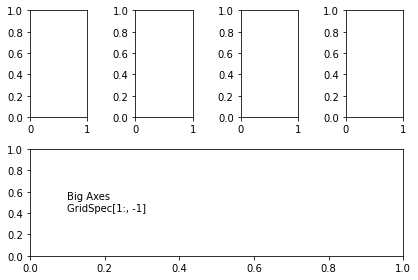

In [90]:


pp.show()

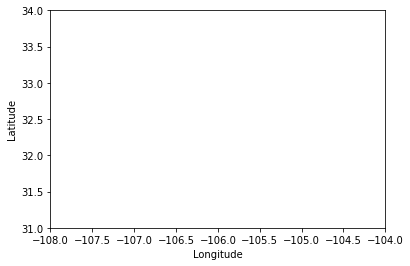

In [92]:
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 

fig = plt.figure()
ax1 = plt.axes(xlim=(-108, -104), ylim=(31,34))
line, = ax1.plot([], [], lw=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plotlays, plotcols = [2], ["black","red"]
lines = []
for index in range(2):
    lobj = ax1.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

x1,y1 = [],[]
x2,y2 = [],[]

# fake data
frame_num = 100
gps_data = [-104 - (4 * random.rand(2, frame_num)), 31 + (3 * random.rand(2, frame_num))]


def animate(i):

    x = gps_data[0][0, i]
    y = gps_data[1][0, i]
    x1.append(x)
    y1.append(y)

    x = gps_data[0][1,i]
    y = gps_data[1][1,i]
    x2.append(x)
    y2.append(y)

    xlist = [x1, x2]
    ylist = [y1, y2]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=10, blit=True)


plt.show()